### **IMPORTING LIBRARIES**

In [155]:
# data manipulation libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing z-score for scaling the data
from sklearn.preprocessing import StandardScaler

# importing method to split and train out data
from sklearn.model_selection import train_test_split

# algorithms to use
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# importing libraries for metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# library for tuning the model
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', None)

# to ignore the warnigns
import warnings
warnings.filterwarnings('ignore')

### Importing the data sets

In [156]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [157]:
# first 5 observations of the train data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
# first 5 observations of the test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## **EDA** (Exploratory Data Analysis)

**SHAPE OF BOTH DATASETS**

In [159]:
# train dataset shape
print(df_train.shape)

# test dataset shape
print(df_test.shape)

(1460, 81)
(1459, 80)


**Observations:**
- The train data only have 1 observation more than the test data as well as one more feature which is the target column `SalePrice`.

**Checking information on the train dataset**

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations:**
- There are `1460 observations` and `80 different features` (columns)
- There are `missing values` in 16 out of the 80 columns.
- There is a decent amount of categorical variables.

 **Checking the percentage of missing data in each column**

In [161]:
missing_val = []
values = []
for col in df_train.columns:
    if (df_train[col].isnull().sum()/df_train[col].shape[0]) != 0:
        missing_val.append(col)
        values.append((df_train[col].isnull().sum()/df_train[col].shape[0])*100)
    else:
        continue
missing_values = pd.DataFrame({'column': missing_val, 'values':values})
missing_values

,column,values
0,LotFrontage,17.739726
1,Alley,93.767123
2,MasVnrType,0.547945
3,MasVnrArea,0.547945
4,BsmtQual,2.534247
5,BsmtCond,2.534247
6,BsmtExposure,2.602740
7,BsmtFinType1,2.534247
8,BsmtFinType2,2.602740
9,Electrical,0.068493


**Observations:**
- A few of our paramaters stand out from the others with the missing values, this are: `PoolQC` with 99% of missing data, `MiscFeature` with 96%, `alley` with 93, `Fence` with 80%, and `FireplaceQu` with 47%
- We are going to drop any column which  missing values are greater than 15%

In [162]:
test_missing_val = []
test_values = []
for col in df_test.columns:
    if (df_test[col].isnull().sum()/df_test[col].shape[0]) != 0:
        test_missing_val.append(col)
        test_values.append((df_test[col].isnull().sum()/df_test[col].shape[0])*100)
    else:
        continue
test_missing_values = pd.DataFrame({'column': test_missing_val, 'values':test_values})
test_missing_values

,column,values
0,MSZoning,0.274160
1,LotFrontage,15.558602
2,Alley,92.666210
3,Utilities,0.137080
4,Exterior1st,0.068540
5,Exterior2nd,0.068540
6,MasVnrType,1.096642
7,MasVnrArea,1.028101
8,BsmtQual,3.015764
9,BsmtCond,3.084304


**Making a copy of both dataset before restructuring them**

In [163]:
# creating copy of the train dataset
df_train_copy = df_train.copy
# creating copy of the test dataset
df_test_copy = df_test.copy

After carefully reviewing the features that each dataset posses, I decided to drop some of the columns that dont have missing values but that are not necessary because their condition is already described by another feature

In [164]:
# dropping train data columns
df_train.drop(columns = ['Id', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                        'LotShape', 'LotConfig', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                        '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish',
                        'GarageArea', 'GarageCond'], inplace = True)

# droppigng test data columns
df_test.drop(columns = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                        'LotShape', 'LotConfig', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                        '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish',
                        'GarageArea', 'GarageCond'], inplace = True)

In [165]:
print('train data new shape:',df_train.shape)
print('test data new shape:', df_test.shape)

train data new shape: (1460, 49)
test data new shape: (1459, 49)


**Dropping the rows with Nan values**

In [166]:
# dropping null values in the train dataset (by default the axis is set to 0 so we are not going to specify it)
df_train.dropna(inplace = True)

# dropping null values in the test dataset (by default the axis is set to 0 so we are not going to specify it)
df_test.dropna(inplace = True)

# printing the new shape to check how many observations were dropped
print('train data new shape:', df_train.shape)
print('test data new shape:', df_test.shape)

train data new shape: (1348, 49)
test data new shape: (1336, 49)


**Observations::**
We have removed all the missing data from our datasets, now we are going to check if every element on each features of our dataset is the same in both test and train data.

In [167]:
for colum in list(df_train.select_dtypes('object')):
    for unique_val in df_train[colum].unique():
        if unique_val not in df_test[colum].unique():
            print('column name:', colum)
            print(unique_val)
        else:
            continue

print('**'*15)

for colum in list(df_test.select_dtypes('object')):
    for unique_val in df_test[colum].unique():
        if unique_val not in df_train[colum].unique():
            print('column name:', colum)
            print(unique_val)
        else:
            continue

column name: Utilities
NoSeWa
column name: HouseStyle
2.5Fin
column name: Heating
Grav
column name: Heating
OthW
column name: Electrical
Mix
column name: Functional
Sev
column name: GarageQual
Ex
******************************
column name: ExterCond
Po


In [168]:
drop_dict = {'Utilities':'NoSeWa', 'HouseStyle':'2.5Fin', 
             'Electrical':'Mix', 'Functional':'Sev', 'GarageQual':'Ex'}
# dropping values from train data
for key in drop_dict.keys():
    df_train.drop(df_train[df_train[key] == drop_dict[key]].index, inplace = True)
    
df_train.drop(df_train[df_train['Heating'] == 'Grav'].index, inplace = True)
df_train.drop(df_train[df_train['Heating'] == 'OthW'].index, inplace = True)

# dropping values from test data
df_test.drop(df_test[df_test['ExterCond'] == 'Po'].index, inplace=True)
df_test.drop(df_test[df_test['BsmtCond'] == 'Po'].index, inplace=True)

# creating ID columns from the test data to compare later
id_col = df_test['Id']

# dropping the ID columsn from the test data
df_test.drop(columns = 'Id', inplace = True)

In [169]:
print('final shape of train data: ', df_train.shape)
print('final shape of test data: ', df_test.shape)

final shape of train data:  (1333, 49)
final shape of test data:  (1334, 48)


**DATA DESCRIPTION**

In [170]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1333.0,55.982746,41.198839,20.0,20.0,50.0,70.0,190.0
LotArea,1333.0,10701.678920,10363.257456,1300.0,7742.0,9600.0,11717.0,215245.0
OverallQual,1333.0,6.231808,1.324682,2.0,5.0,6.0,7.0,10.0
OverallCond,1333.0,5.589647,1.064206,2.0,5.0,5.0,6.0,9.0
YearBuilt,1333.0,1973.744186,29.221323,1880.0,1957.0,1976.0,2002.0,2010.0
YearRemodAdd,1333.0,1985.996999,20.193173,1950.0,1969.0,1995.0,2004.0,2010.0
LowQualFinSF,1333.0,2.546887,29.906339,0.0,0.0,0.0,0.0,528.0
GrLivArea,1333.0,1535.246812,511.363360,438.0,1166.0,1482.0,1788.0,5642.0
FullBath,1333.0,1.579895,0.547134,0.0,1.0,2.0,2.0,3.0
HalfBath,1333.0,0.405101,0.504667,0.0,0.0,0.0,1.0,2.0


**Observations:**
- The average Lot size is 10,701.
- The `overall materials and finish` of the houses is **above average**.
- While the `overall condition` of the houses is **Average**.
- Most of the houses were built in 1973. The `oldest` houses were built in **1880** and the `most recent` in **2010**.
- The majority of the houses where `remodelated` between the years **1950 and 1995**.
- The majority of the houses have `2 full bathdrooms above ground`.
- Most houses have 1 just `one fire place`.
- The majority of the houses have a 2 **car's** `garage capacity`.
- The `month` the majority of the houses were sold was between May and June.
- Most houses were sold in between years 2007 and 2008.
- The average sale price is 187,390 US dollars.

### **DATA VISUALIZATION**

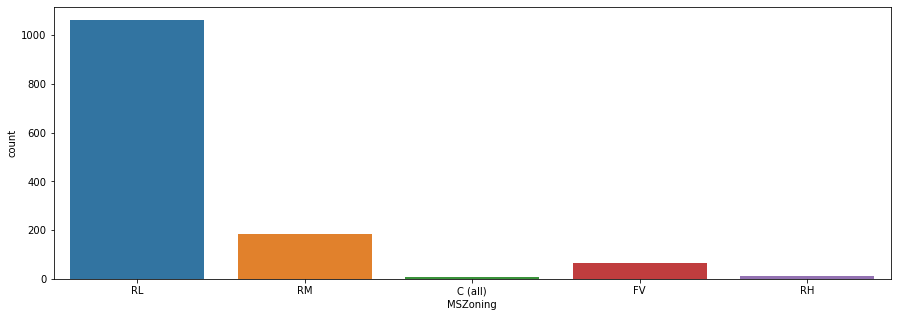

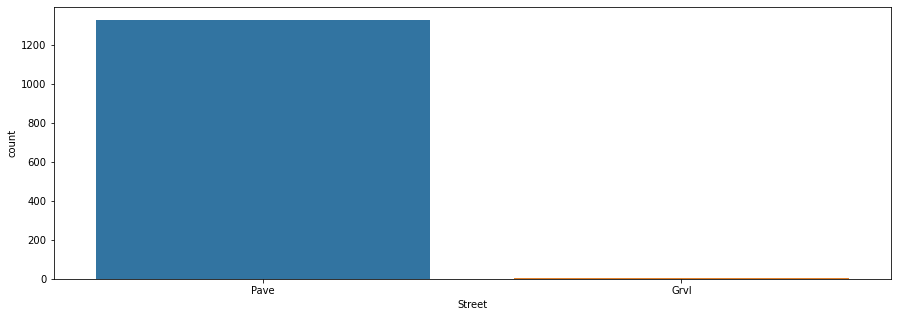

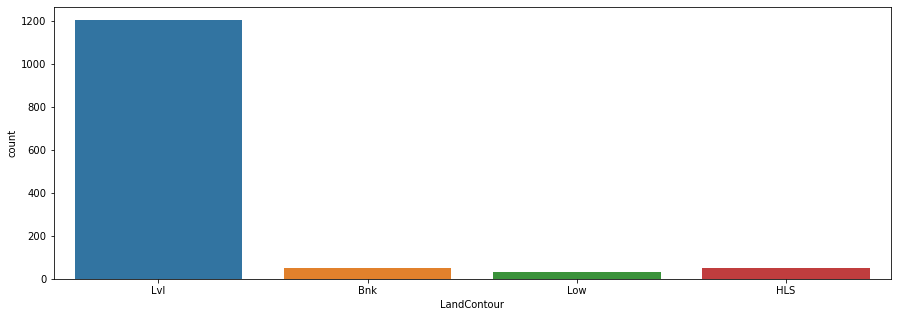

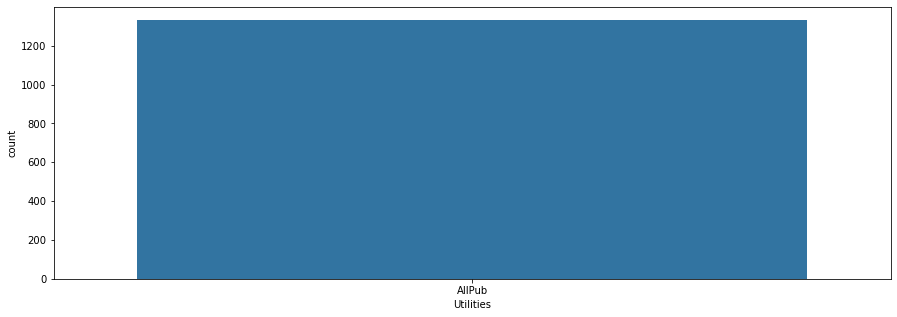

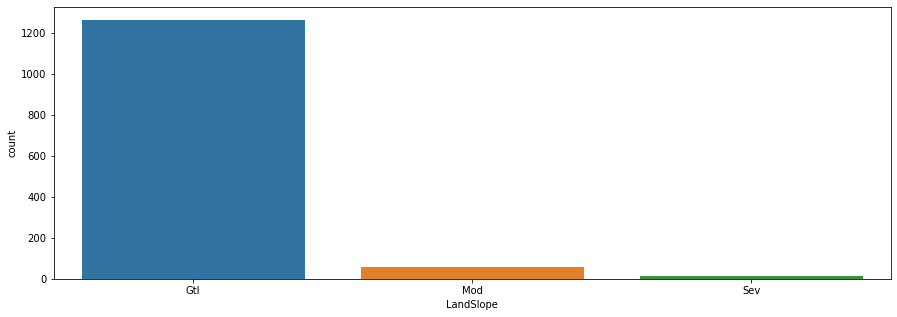

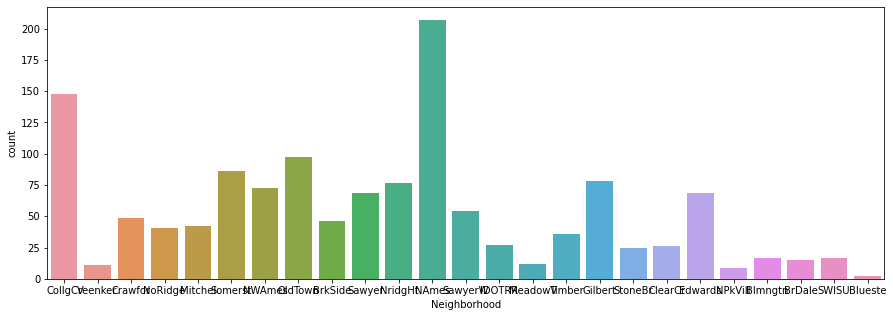

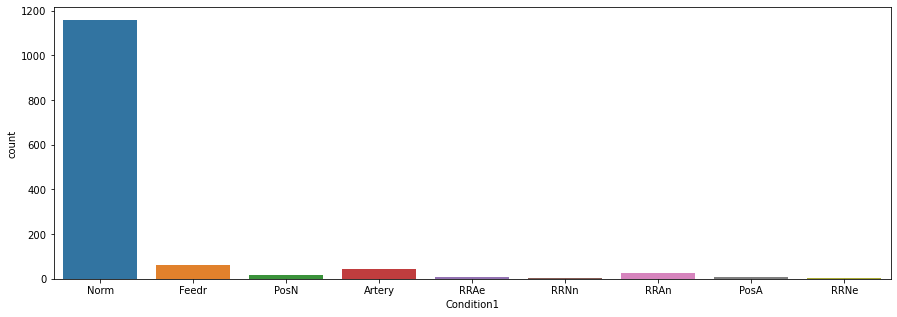

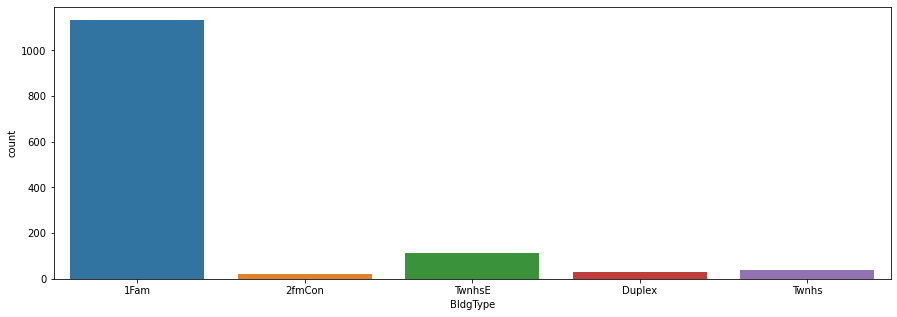

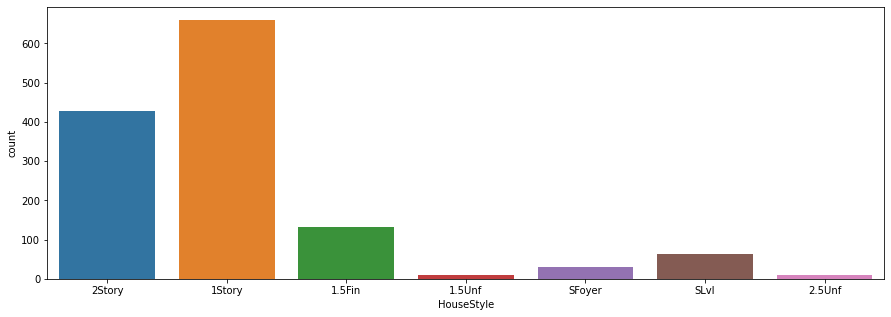

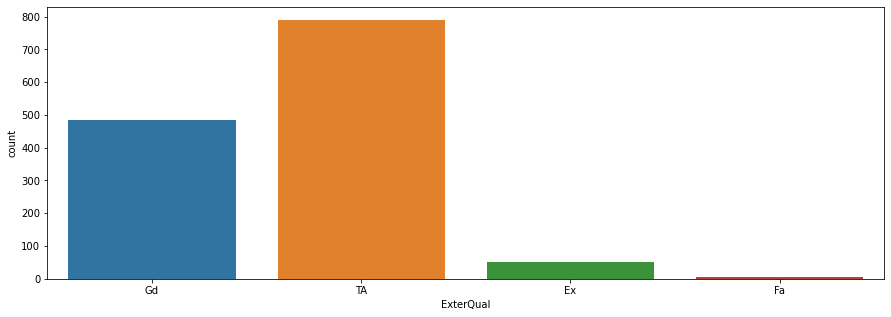

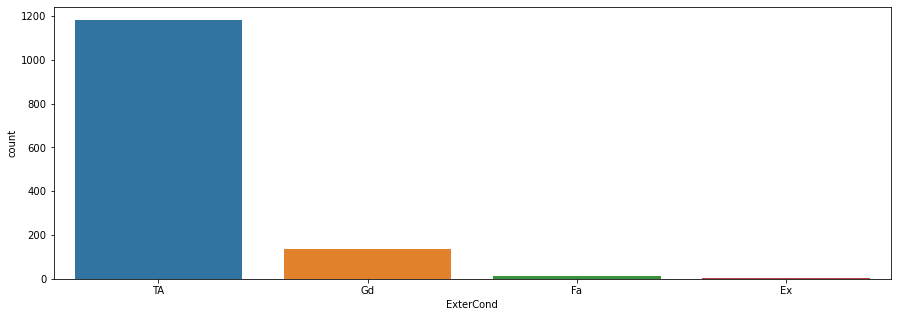

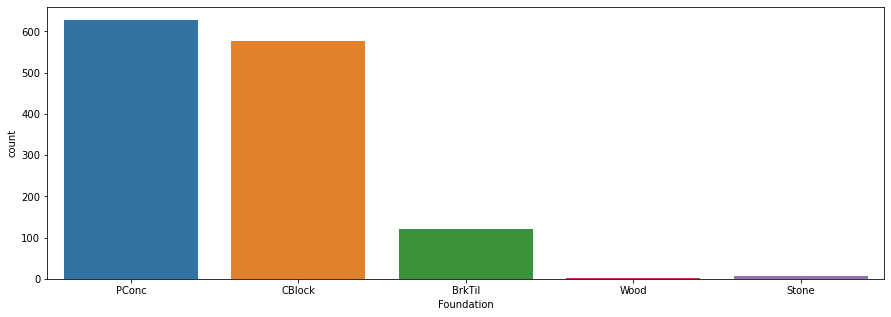

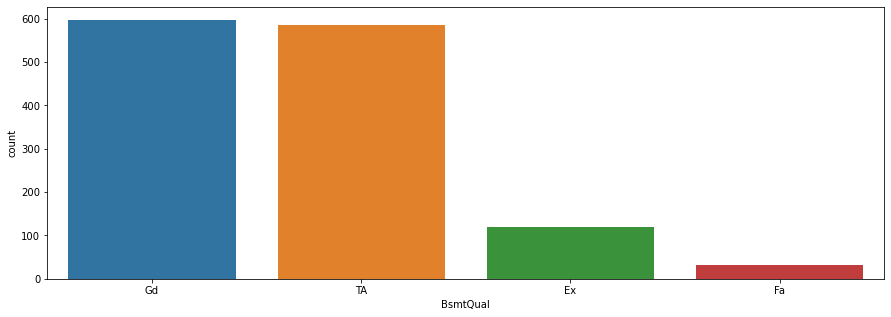

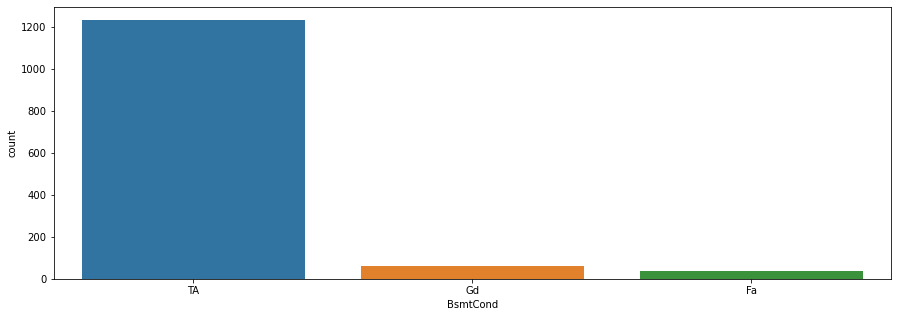

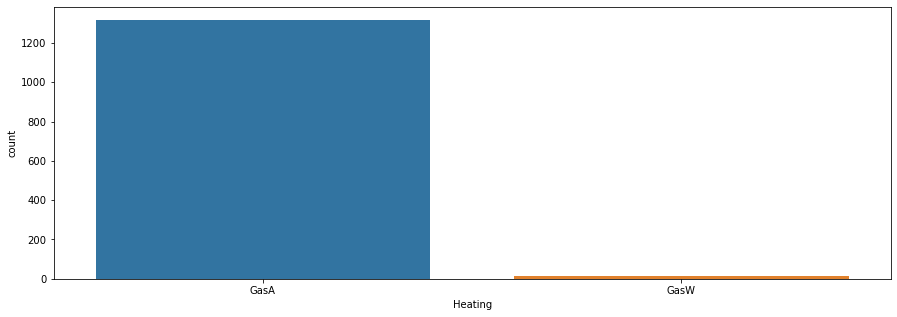

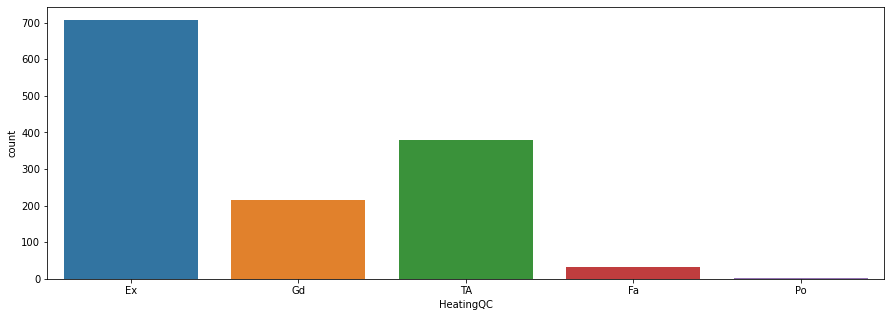

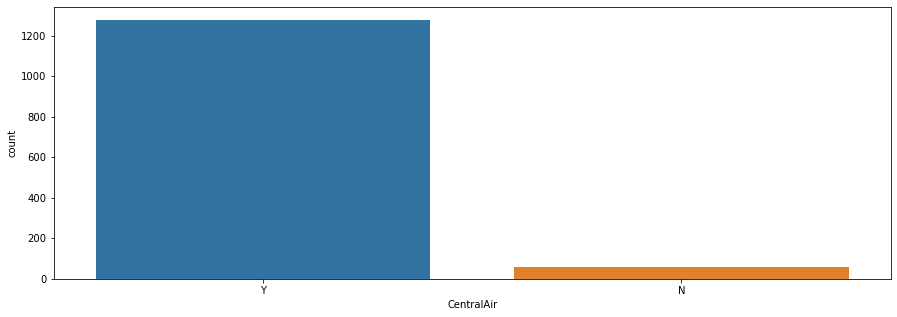

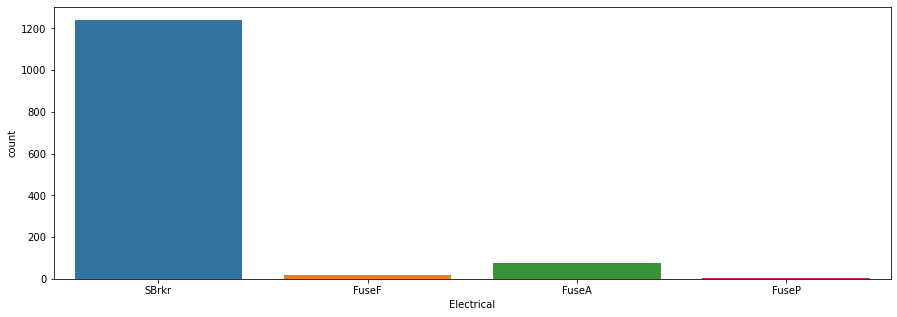

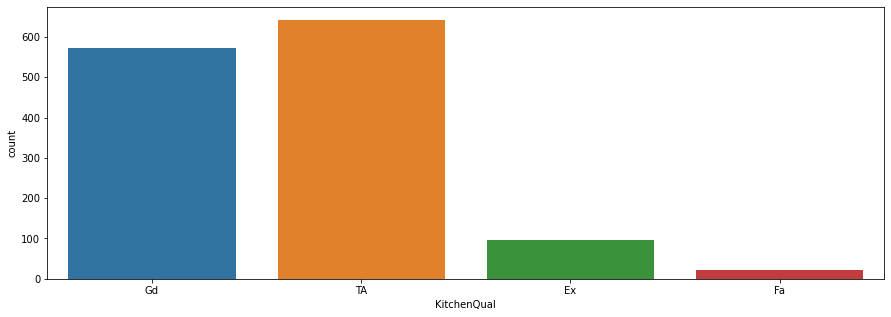

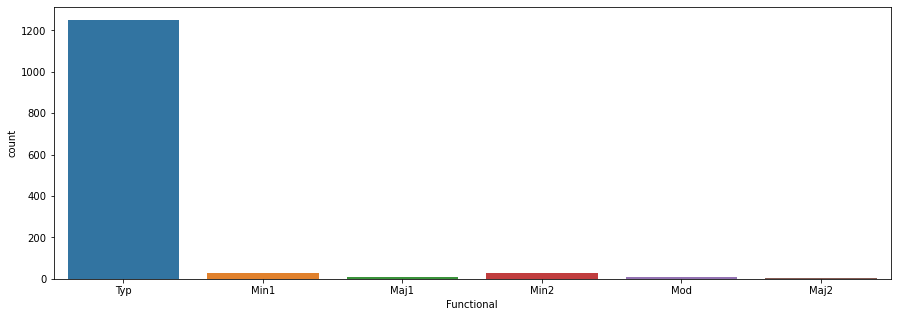

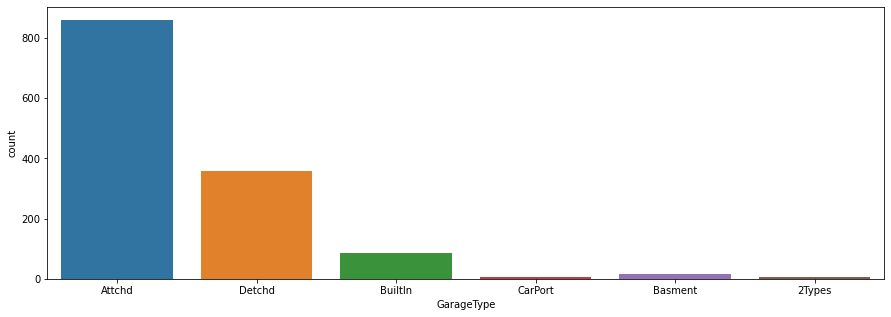

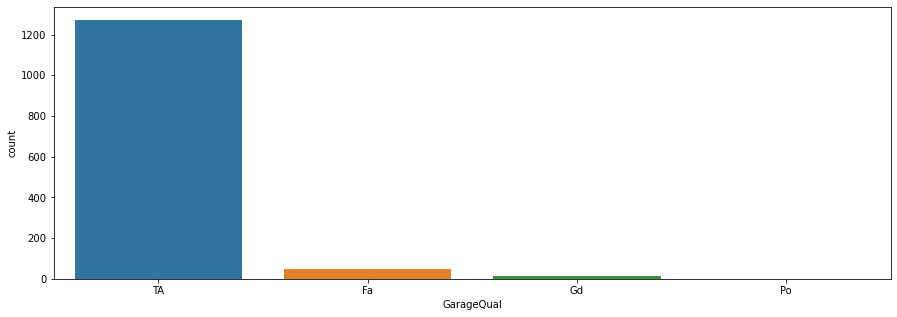

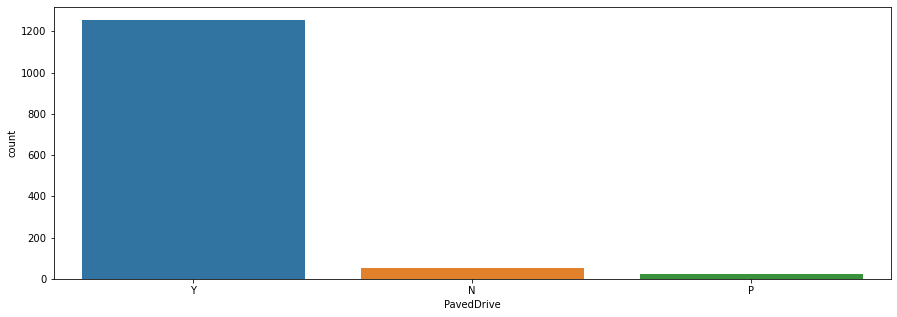

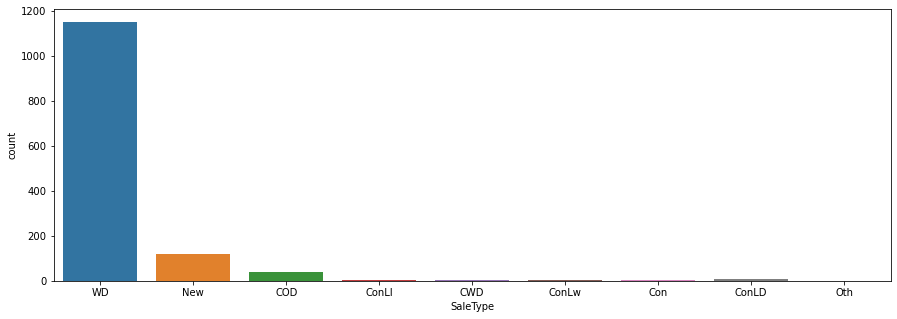

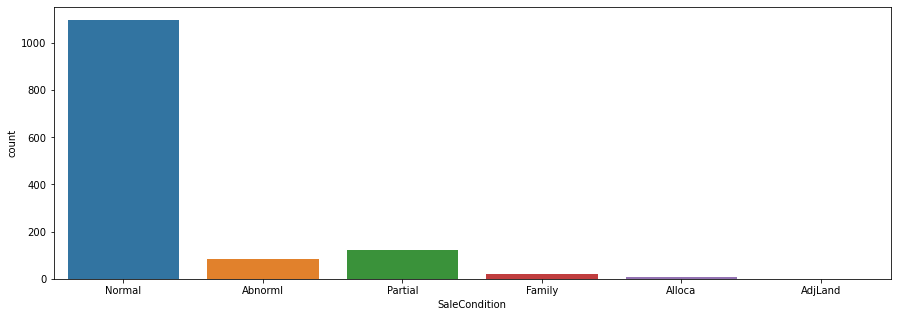

In [171]:
cat_features = list(df_train.select_dtypes('object'))
for i in cat_features:
    plt.figure(figsize = (15,5))
    sns.countplot(x = i, data = df_train)
    
    plt.show()

**Observations:**
- Zoning classification: the most common is the `Residential low density` followed by the `median density`
- Almost all the `road` are `paved`.
- Most of the streets are `paved`
- The `contour` of the houses are almost **flat**.
- The majority of the houses have a `gentel slope`.
- The condition of the houses are normal.
- Most of the houses are `single family detached`.
- The `style` of the houses are mostly `1 story` followed by` 2 story` house style.
- The exterior quality is between `average` and `good`.
- The exterior condition is mostly `average`.
- The majority of the foundation of the houses are made of `pure concrete`, and `cinder block`.
- The `basement condition` of almost all of houses is `Typical/ average`.
- The heating in almost of the houses is `Gas` and the quality is mostly excellent and the majority of the houses and in the others is `either average` or `good`.
- pretty much all of houses have `central air` with the exception of a few.
- The electrical type in the houses is `Standard circuit breaks and Romeo`.
- The kitchen's quality are mostly between `typical/average` and `good`.
- Most of the garage are `attached` to the house, and the rest are `dittached`.
- The `quality` of the garages is `normal`
- The **Sale Type** is mostly `conventional`  and under `normal conditions`.

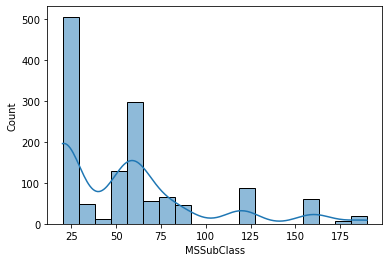

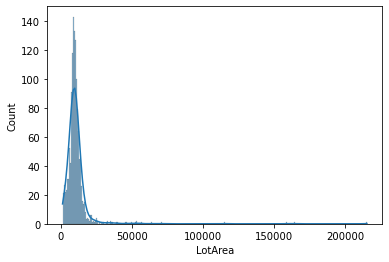

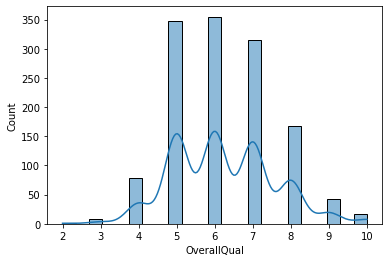

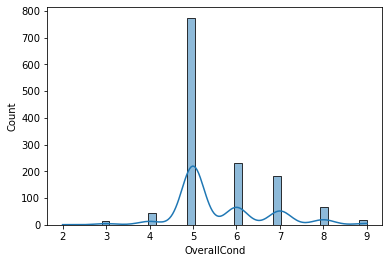

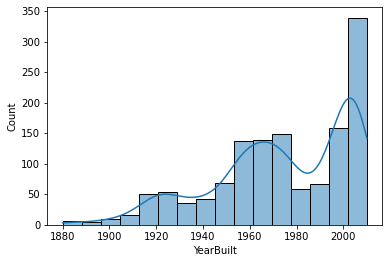

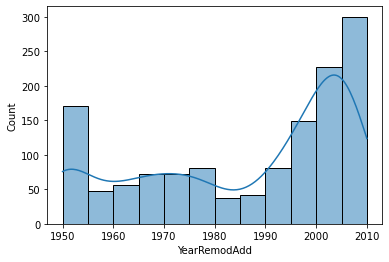

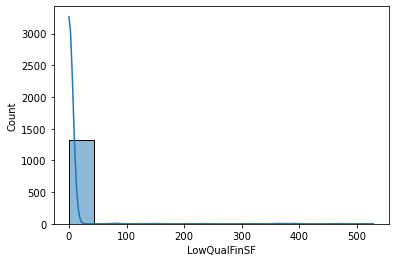

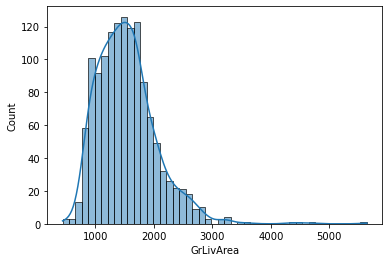

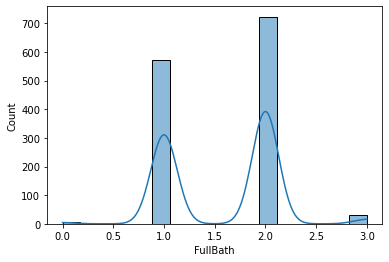

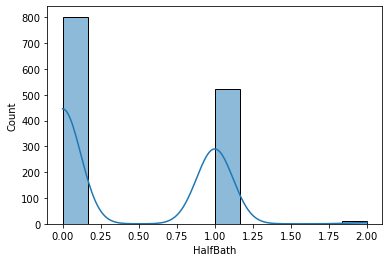

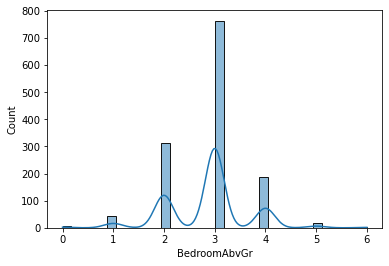

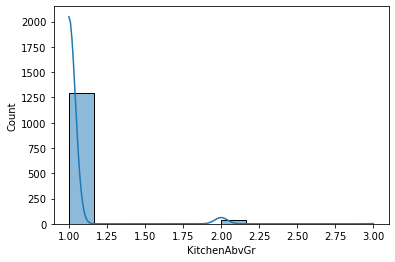

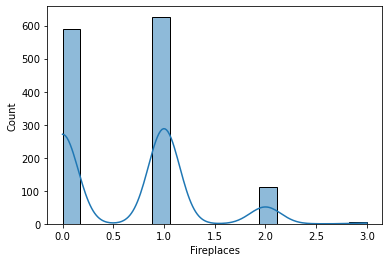

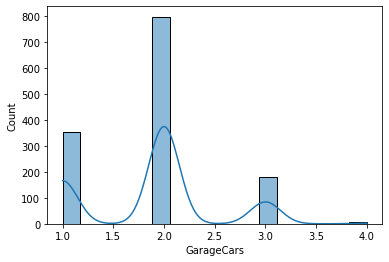

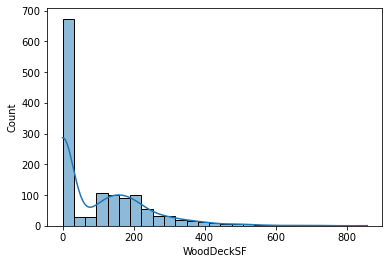

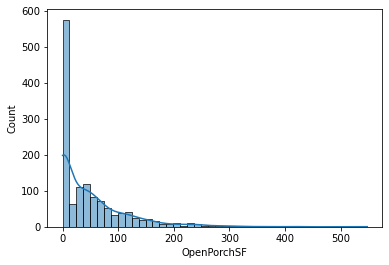

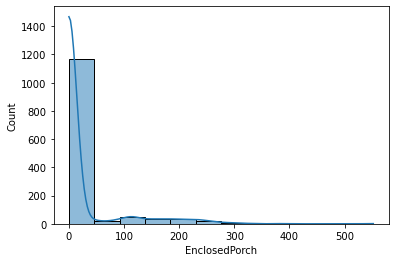

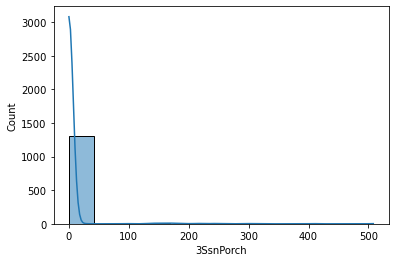

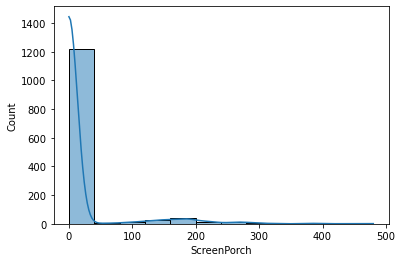

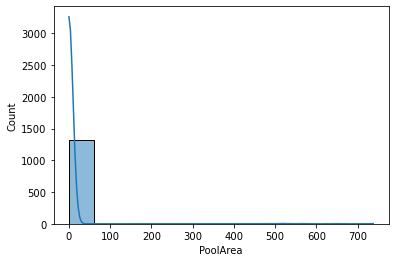

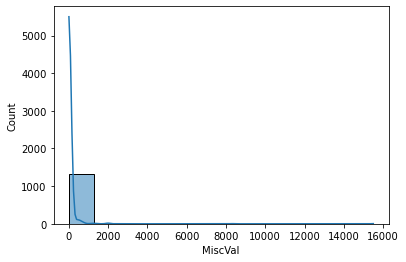

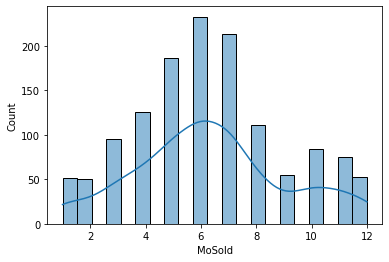

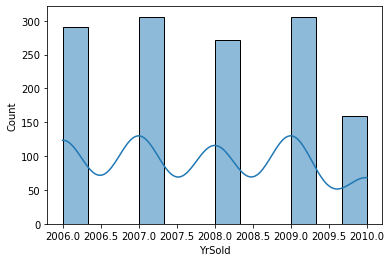

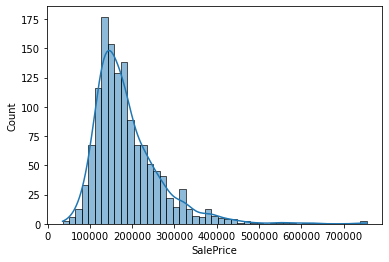

In [172]:
for i in list(df_train.select_dtypes(['int64', 'float64'])):
    
    fig, axe = plt.subplots()
    
    sns.histplot(x = i, data = df_train, kde = True)
    
    plt.show()

**Observations:**
- A lot of the buildings were built between 2000 and 2010 but also a lot of remodelation were made that same year.
- The majority of the buildings are **sold** betwenn `May and July`.
- The `SalePrice` columns is righ skewed, which indicates that most of the sales prices are low.

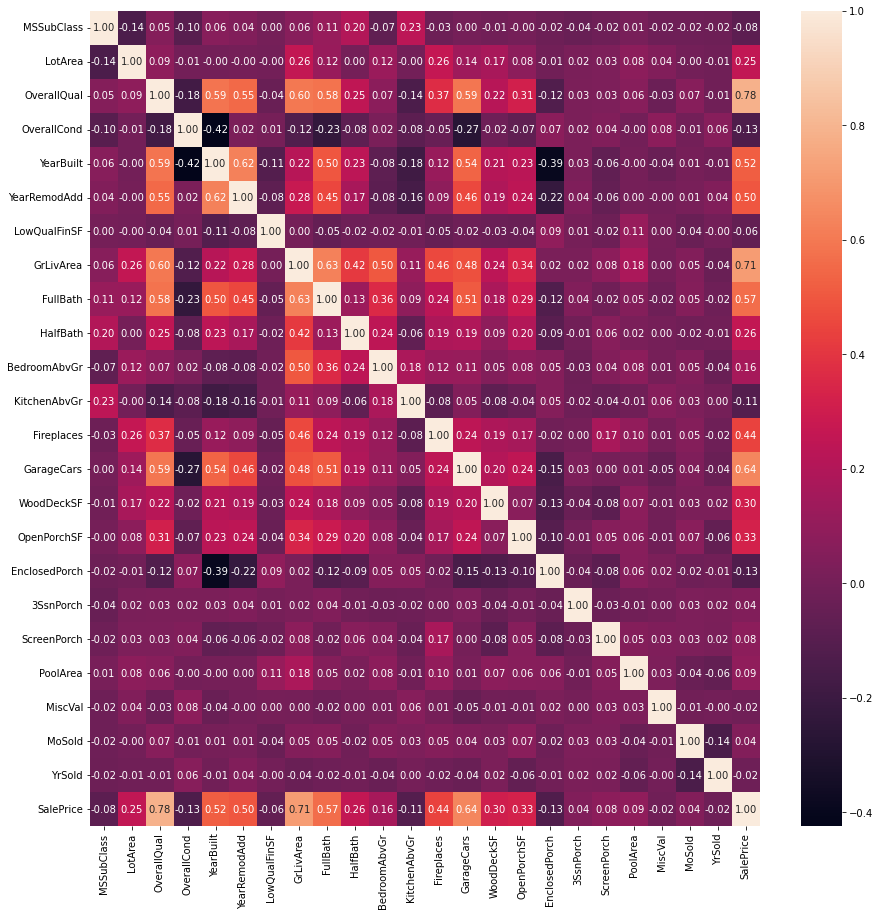

In [173]:
correlation = df_train.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation, annot=True, fmt = '.2f')
plt.show()

**Observations:**
- The features that are more correlated with the `target Variable/SalePrice` are: the `OverallQuality with 78%`, the `GrLiveArea with 71%`, the `GarageCars with 64%`, The number of full bath `FullBath with 57%` the built year `YearBuilt with 52%`, and the year of remodelation.
- Also the `Overall quality` of the place is highly correlated with the `square feets of living area`, the `year it was built`, `the number of full bathroom`, `the remodelation year` and `the number of cars in the garage`.

### Bivariate graphs 

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

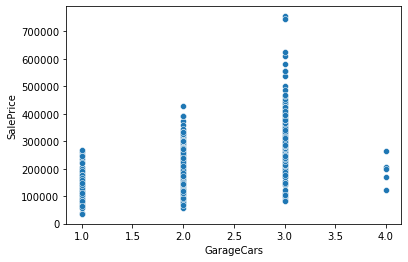

In [117]:
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = df_train)

**observations:**
- The greater the capacity of the cagarage the more expensive the house but only till certain point.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

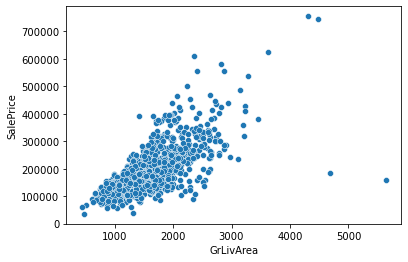

In [118]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

**Observation:**
- The greater the square feet of living, the greater the price, even though we can notice there are a few exceptions to this rule which may be due to other factors.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

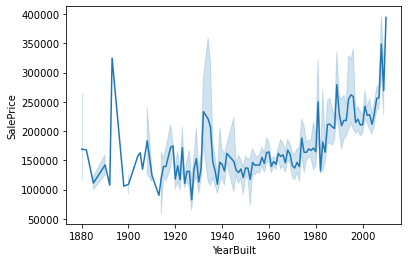

In [119]:
sns.lineplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)

**Observation:**
- We can notice that the depending on the year the house or building was built the sale price increase.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

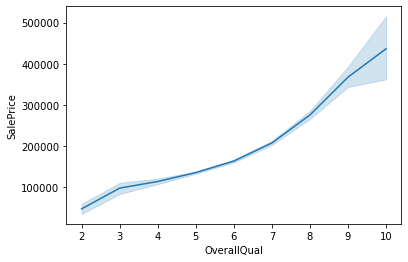

In [120]:
sns.lineplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

**Observations:**
- the greater the `quality of the house/building` the greater the `price`.

## **Data preparation for modeling**

In [121]:
# separating the target variable from the others
X = df_train.drop(columns = 'SalePrice')

# separating the outcome variable from the others
Y = df_train['SalePrice']

# creating dummy variables for the catgorical data
X = pd.get_dummies(X, drop_first=True)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,LowQualFinSF,GrLivArea,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,0,1710,2,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0,1262,2,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,0,1786,2,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0,1717,1,0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,0,2198,2,1,...,0,0,0,0,1,0,0,0,1,0


In [124]:
# creating dummy variables for the categorical data
test_features = pd.get_dummies(df_test,  drop_first = True)
test_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,LowQualFinSF,GrLivArea,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,0,896,1,0,...,0,0,0,0,1,0,0,0,1,0
1,20,14267,6,6,1958,1958,0,1329,1,1,...,0,0,0,0,1,0,0,0,1,0
2,60,13830,5,5,1997,1998,0,1629,2,1,...,0,0,0,0,1,0,0,0,1,0
3,60,9978,6,6,1998,1998,0,1604,2,1,...,0,0,0,0,1,0,0,0,1,0
4,120,5005,8,5,1992,1992,0,1280,2,0,...,0,0,0,0,1,0,0,0,1,0


In [125]:
print('train features shape: ', X.shape)
print('test features shape: ', test_features.shape)

train features shape:  (1333, 130)
test features shape:  (1334, 130)


**CREATING VALIDATION DATA AND TRAINING TO TEST THE MODEL BEFORE EVALUATING THE TEST DATASET**

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    random_state = 42)

# **Bulding the models**

### MODEL 1 DECISION TREE

In [127]:
# creating an instance of the the randomforest class
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**Calculating precision of the model**

In [128]:
regressor.score(X_test, y_test)

0.699000281460034

**Observations:**
- The first model have an accuracy of 70% but we are going to try and improve the metric using other methods

### Hyperparameter tuning

In [130]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}


In [131]:
tuning_regressor = GridSearchCV(regressor,param_grid=parameters,cv=3,verbose=3)

In [ ]:
tuning_regressor.fit(X_train, y_train)

In [133]:
# best parameters for our model
tuning_regressor.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

**MODEL 1 TUNNED**

In [134]:
regressor_tuned = DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes = None,
                                       min_samples_leaf = 1, min_weight_fraction_leaf = 0.1,
                                       splitter = 'best')

In [135]:
# fitting the tuned parameters
regressor_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [136]:
# checkin the accuracy of the tunned model
regressor_tuned.score(X_test, y_test)

0.6165531171395422

**Observations:**
- After tuning the hyperparameter our accuracy have decrease, we are going to try and build another model but now using Random Forest algorithms

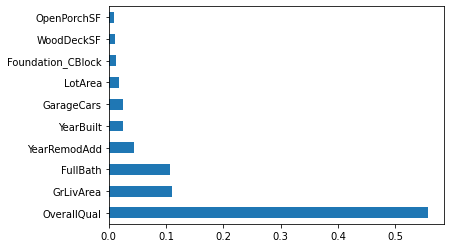

In [137]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### MODEL 2 RANDOM FOREST

In [138]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1) 

In [139]:
# training the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [140]:
# measuring the accuracy of the random forest model
rf_regressor.score(X_test, y_test)

0.8546754111878121

**Observations:**
- The random forest model's accuracy is 85% which is the greatest so far lets see if we can improve the results by tuning the parameters.

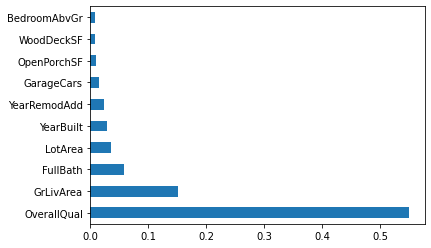

In [141]:
feat_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Hyperparameter tuning

In [142]:
# first printing the current parameters that our based RF model is using
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

**RANDOM FOREST HYPERPARAMETER TUNING**

In [143]:
parameters = {"bootstrap":[True, False],
            "max_depth" : [10,20,30,40],
           "min_samples_leaf":[1,2,3,4],
           "min_samples_split":[2,5,7,10],
           "max_features":["auto","log2","sqrt"],
           "n_estimators":[50,100,150,200] }

In [144]:
rf_regression_grid = GridSearchCV(rf_regressor, param_grid = parameters, cv = 3, n_jobs = -1, verbose = 3)

In [145]:
rf_regression_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [146]:
# the best parameters to use in our random forest model
rf_regression_grid.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [147]:
# building the random forest model with best parameters
rf_regressor_tuned = RandomForestRegressor(bootstrap = False, max_depth = 40,
                                          max_features = 'sqrt', min_samples_leaf = 1,
                                          min_samples_split = 2, n_estimators = 200)

In [148]:
# training the model with our training data
rf_regressor_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=200)

In [150]:
# measuring the accuracy results
rf_regressor_tuned.score(X_test, y_test)

0.8649245967655046

**Observations:**
- The accuracy of our random forest with tuned parameters is 86% which is lower than the based rando forest model so we are going to chose the based random forest model as our final model design.

**IMPORTANCE FEATURES THAT AFFECT THE RESULTS**

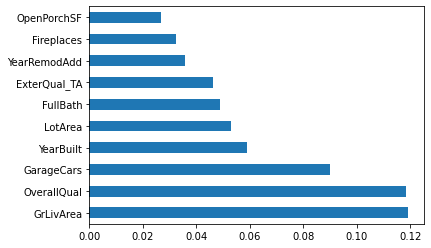

In [154]:
feat_importances = pd.Series(rf_regressor_tuned.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**CREATING DATAFRAME WITH THE ID AND PREDICTION RESULTS**

In [152]:
# predicting the test data
test_predictions = rf_regressor_tuned.predict(test_features)

# creating dataframe with the ids and the predictions
df_prediction = pd.DataFrame({'Id':id_col, 'SalePrice_predicted':test_predictions})

df_prediction.head()

,Id,SalePrice_predicted
0,1461,123369.845
1,1462,156672.875
2,1463,180632.400
3,1464,194364.400
4,1465,212153.810


In [153]:
df_prediction.shape

(1334, 2)

**OBSERVATIONS:**
The final model design would be the one with the greatest performance which in our case is the random forest with the tuned parameters, with a 86% accuracy.
Different from the other models the features with the most influence in this model are: `GrLvArea`,`OverallQual`, `GarageCars`, `YearBuilt`,`LotArea`,`FullBath`,`ExterQual_TA`,`YearRemodAdd`,`Fireplaces`,`OpenPorchSF`.